<a href="https://colab.research.google.com/github/NetBhatia/deep-learning-challenge/blob/main/AlphabetSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
uniq_valu = application_df.dtypes.index.tolist()
application_df[uniq_valu].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
apptype_count = application_df['APPLICATION_TYPE'].value_counts()
apptype_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(apptype_count[apptype_count < 500].index)


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# Look at CLASSIFICATION value counts for binning
classification_vcount = application_df['CLASSIFICATION'].value_counts()
classification_vcount

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [13]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_vcount1 = classification_vcount[classification_vcount>1]
classification_vcount1

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [16]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_vcount[classification_vcount < 1500].index)


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
numapp_df = pd.get_dummies(application_df)
numapp_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
# Split our preprocessed data into our features and target arrays
y = numapp_df["IS_SUCCESSFUL"]
X = numapp_df.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
hid_nodes_layer1 = 80
hid_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hid_nodes_layer1, input_dim=num_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hid_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3440      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5901 (23.05 KB)
Trainable params: 5901 (23.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5725 - accuracy: 0.7212
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5577 - accuracy: 0.7289
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7308
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5524 - accuracy: 0.7320
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5508 - accuracy: 0.7322
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5499 - accuracy: 0.7320
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5483 - accuracy: 0.7337
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5481 - accuracy: 0.7336
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5475 - accuracy: 0.7350
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5473 - accura

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5562 - accuracy: 0.7264 - 509ms/epoch - 2ms/step
Loss: 0.5562019348144531, Accuracy: 0.7264139652252197


<Axes: >

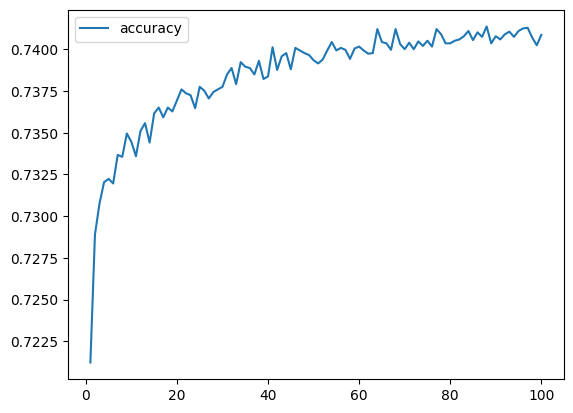

In [26]:
# plotting the accuracy
acc_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
acc_df.plot(y = 'accuracy')

In [29]:
# Export our model to HDF5 file
from google.colab import files

nn.save('Models/AlphabetSoupCharity1.h5')
files.download('/content/Models/AlphabetSoupCharity1.h5')

First try outcome:

APPLICATION_TYPE cutoff = 500
CLASSIFICATION cutoff = 1500
layer1 = 80 : activation function = relu
layer2 = 30 : activation function = relu

Loss: 0.5562, Accuracy: 0.7264

A loss value of 55 indicates that the model can be further optimized.
The accuracy rate signifies that the 72% of model's predicted values align with the true values in the original dataset.

In [30]:
# Second try:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
hid_nodes_layer1 = 80
hid_nodes_layer2 = 50
hid_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hid_nodes_layer1, input_dim=num_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hid_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hid_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                3440      
                                                                 
 dense_7 (Dense)             (None, 50)                4050      
                                                                 
 dense_8 (Dense)             (None, 30)                1530      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 9051 (35.36 KB)
Trainable params: 9051 (35.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Train the model
fit_model1 = nn.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5349 - accuracy: 0.7405
Epoch 2/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5344 - accuracy: 0.7421
Epoch 3/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5340 - accuracy: 0.7417
Epoch 4/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5345 - accuracy: 0.7417
Epoch 5/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5345 - accuracy: 0.7411
Epoch 6/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5348 - accuracy: 0.7420
Epoch 7/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5342 - accuracy: 0.7416
Epoch 8/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5341 - accuracy: 0.7412
Epoch 9/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5339 - accuracy: 0.7411
Epoch 10/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5342 - accura

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5896 - accuracy: 0.7269 - 448ms/epoch - 2ms/step
Loss: 0.5895557403564453, Accuracy: 0.7268804907798767


Second try outcome:

APPLICATION_TYPE cutoff = 500 CLASSIFICATION cutoff = 1500
layer1 = 80 : activation function = relu
layer2 = 50 : activation function = relu
layer2 = 30 : activation function = relu

Loss: 0.5896, Accuracy: 0.7269

With the second try as well the outcome is the same as the first one.

In [35]:
# Attempt 3:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
hid_nodes_layer1 = 100
hid_nodes_layer2 = 70
hid_nodes_layer3 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hid_nodes_layer1, input_dim=num_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hid_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hid_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               4300      
                                                                 
 dense_11 (Dense)            (None, 70)                7070      
                                                                 
 dense_12 (Dense)            (None, 40)                2840      
                                                                 
 dense_13 (Dense)            (None, 1)                 41        
                                                                 
Total params: 14251 (55.67 KB)
Trainable params: 14251 (55.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
# Train the model
fit_model2 = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5677 - accuracy: 0.7227
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5565 - accuracy: 0.7317
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7304
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5521 - accuracy: 0.7298
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5504 - accuracy: 0.7331
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5499 - accuracy: 0.7315
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5478 - accuracy: 0.7328
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5483 - accuracy: 0.7340
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5469 - accuracy: 0.7336
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5466 - accura

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5543 - accuracy: 0.7244 - 492ms/epoch - 2ms/step
Loss: 0.5543349385261536, Accuracy: 0.7244315147399902


After the third attempt also, the accuracy remains around 73%.

Analysis Report:

Overview of the analysis:
The nonprofit foundation Alphabet Soup wants a tool that can help it select the applicants for funding with the best chance of success in their ventures.

For this purpose data contained in the csv file is reviewed and pre-processed to create a model to predict the applicants' performance.

Results:
Data Preprocessing

The column "Is_Successful" is considered as variable(s) and is the target(s) for the model. Remaining columns are the features for your model?
EIN and Name (identification columns) were removed from the input data because they were neither targets nor features.

Compiling, Training, and Evaluating the Model

Model was created initially with 2 layers and then 3 layers. However, the performance could not exceed 74% despite 3 attempts.

To increase model performance, count of epochs were changed, activation functions were changed (relu/tanh), number of hidden layers were increased. However, it still did not improve.

Summary: The model's performance remained around 74% that means model's prediction would align 74% times with actual results.